# Machine Learning and Data Mining: Lab 02 - Solution
---------------

#### Exercise 1: Working with matrices
The Python package ``numpy``allows to work with vectors and matrices. Install the package and use the following command to create a ``numpy`` array and answer the follwoing questions. Write down the commands you need to solve each tasks in a separate code cell. The commands have to work for different matrices as well. 

In [1]:
import numpy as np

my_matrix = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [2]:
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

##### __(a) Retrieve and print the second element the of the second row__

In [3]:
my_matrix[1, 1] 

5

##### __(b) Retrieve and print the third row__

In [4]:
my_matrix[2,:] 

array([7, 8, 9])

##### __(c) Retrieve and print the whole frist column__

In [5]:
my_matrix[:,0] 

array([1, 4, 7])

##### __(d) Retrieve the diagonal of the matrix__

In [6]:
np.diag(my_matrix) 

array([1, 5, 9])

##### __(e) Retrieve the sum of each row. The result should therefore be ``[6, 15, 24]``__

In [7]:
np.sum(my_matrix, axis=1) 

array([ 6, 15, 24])

##### __(f) Multiply all elements of the matrix with ``2`` and print all elements bigger than ``>10``__

In [8]:
my_matrix = my_matrix * 2 

In [10]:
my_matrix[my_matrix>10] 

array([12, 14, 16, 18])

---

#### Exercise 2: Working with numpy and images
The package ``numpy`` allows to load and process images. 

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

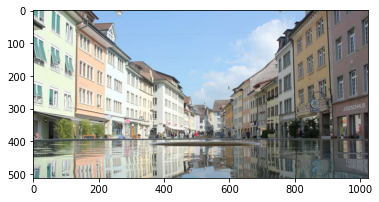

In [4]:
image = imread('winthi.jpg')
plt.imshow(image)

##### __(a) Select and displays the following section of the image - all pixels between 0 and 400 pixels on the x- and y-axis__

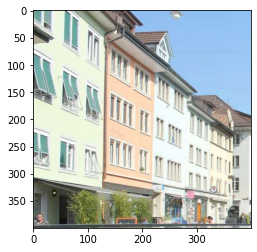

In [5]:
plt.imshow(image[0:400, 0:400])

##### __(b) Change the brigthness of the image by multiplying it with ``0.002``__

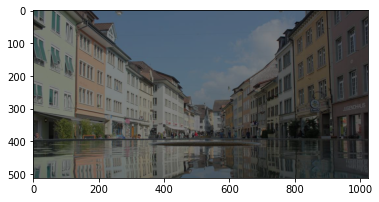

In [6]:
plt.imshow(image * 0.002)  

---

#### Exercise 3: Working with dataframes
The Python package ``pandas``allows to work with data as a 2D heterogeneous tabular data structure. Install the package and use the following command to create a ``pandas`` dataframe 

In [19]:
import pandas as pd

df = pd.DataFrame(np.array([[1,2,3,4,5], [5,7,8,9,10], [11,12,13,14,15], [16,17,18,19,20]]), columns=['a', 'b', 'c', 'd', 'e'])

In [20]:
df

,a,b,c,d,e
0,1,2,3,4,5
1,5,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


##### __(a) Retrieve and print the column ``b`` and the whole frist row__

In [21]:
df['b'] 

0     2
1     7
2    12
3    17
Name: b, dtype: int64

In [23]:
# df.loc[[0]] 
df.iloc[0] 

a    1
b    2
c    3
d    4
e    5
Name: 0, dtype: int64

##### __(b) Add ``5`` to each element of the column ``a``__

In [24]:
df['a'] = df['a'] + 5 

In [25]:
df['a']

0     6
1    10
2    16
3    21
Name: a, dtype: int64

##### __(c) Remove the column ``a`` from the dataframe__

In [26]:
df.drop('a', axis = 1, inplace=True) 

In [27]:
df

,b,c,d,e
0,2,3,4,5
1,7,8,9,10
2,12,13,14,15
3,17,18,19,20


##### __(d) Iterate through the dataframe and print each row__ _(Hint: use the iterrows() method)_

In [28]:
for item, row in df.iterrows():
    print(row)

b    2
c    3
d    4
e    5
Name: 0, dtype: int64
b     7
c     8
d     9
e    10
Name: 1, dtype: int64
b    12
c    13
d    14
e    15
Name: 2, dtype: int64
b    17
c    18
d    19
e    20
Name: 3, dtype: int64


---

#### Exercise 4: Dataframes
In the following, we will analyze and compare worldwide alcohol consumption.

In [29]:
import pandas as pd

df = pd.read_csv('alcohol.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


##### __(a) Print the alcohol consumption of Germany.__

In [30]:
df['country'] == 'Germany'

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: country, Length: 193, dtype: bool

In [31]:
df[df['country'] == 'Germany'] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
65,Germany,346,117,175,11.3,EU


##### __(b) Print all countries that consume more beer than Germany.__

In [32]:
## Two possible solutions: 
## simple solution 
df[df['beer_servings'] > 346] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
117,Namibia,376,3,1,6.8,AF


In [33]:
## other solution
df[df['beer_servings'] > df[df['country'] == 'Germany']['beer_servings'].iloc[0]] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
117,Namibia,376,3,1,6.8,AF


##### __(c) Print the mean pure alcohol consumption per continent.__

In [34]:
df.groupby('continent')['total_litres_of_pure_alcohol'].mean() 

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

---

##### Exercise 5: Scatterplot Matrices
In this exercise, you will load a dataset into a Python ``pandas.DataFrame`` and genreate a scatterplot matrix visualization. 

##### __(a) Load and print the dataset ``iris.csv``.__

In [35]:
iris_df = pd.read_csv('iris.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### __(b) Remove the column ``species``from the iris dataset.__

In [36]:
iris_df.drop('species', axis=1, inplace=True)  
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### __(c) Generate a scatterplot matrix visualization. Use the package ``seaborn`` and the method ``seaborn.pairplot()``__ 

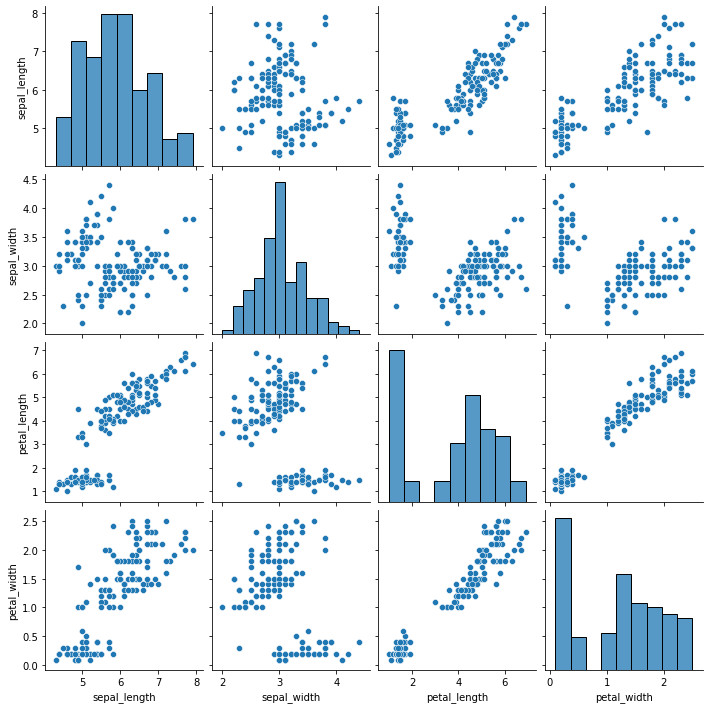

In [37]:
import seaborn as sns

sns.pairplot(iris_df) 

##### __(d) Reload the ``iris`` data. Plot the scatterplot matrix and color the points using the ``species`` column.__ 

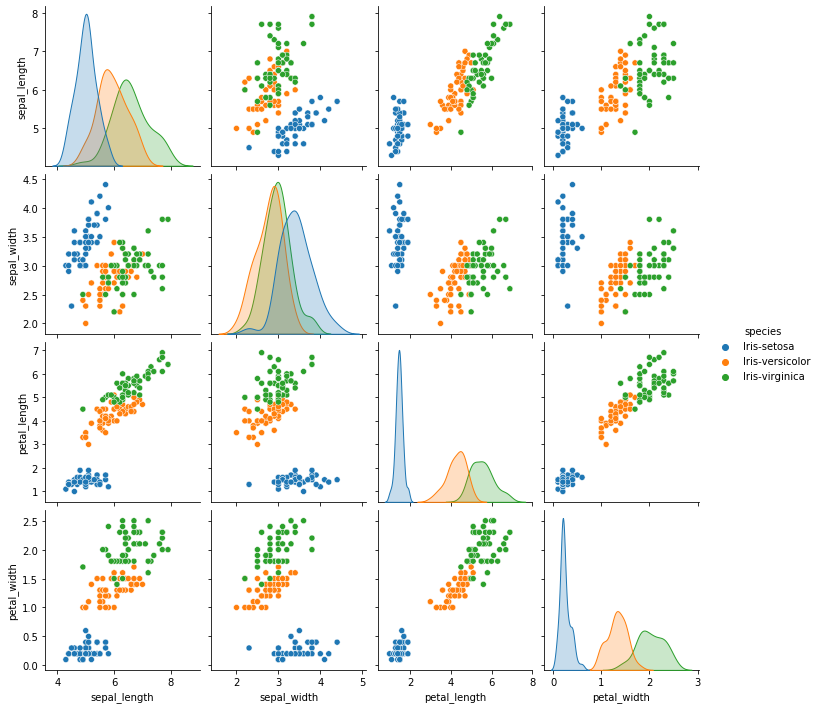

In [38]:
iris_df = pd.read_csv('iris.csv') 
sns.pairplot(iris_df, hue="species") 